In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from wordcloud import WordCloud

In [2]:
df_trip = pd.read_csv("./Preprocesado_Trip.csv", index_col = False)
df_expedia = pd.read_csv("./Preprocesado_Expedia.csv", index_col = False)

In [3]:
df = pd.concat([df_trip, df_expedia])

In [4]:
df.reset_index(drop = True, inplace = True)

In [5]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [6]:
df.drop_duplicates(inplace = True)

In [7]:
df

,opinion,mes,año,retroalimentacion
0,"El Hotel es una reliquia, un techo espectacula...",5,2020,1
1,Es un excelente lugar para compartir pues la a...,4,2021,1
2,Muy buen ambiente en la terraza la verdad pasa...,4,2021,1
3,"Excelente servicio por Alejandro, capitán Cesa...",4,2021,1
4,Todo muy delicioso y muy buena atención 10/ 1...,4,2021,1
...,...,...,...,...
6121,Day and night work on the square. Lots of nois...,8,2017,0
6122,"Great hotel to stay, the staff was great very ...",8,2017,1
6123,Sin reseña,8,2017,1
6124,The welcome was amazing: a glass of champagne ...,8,2017,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5704 entries, 0 to 6125
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   opinion            5704 non-null   object
 1   mes                5704 non-null   int64 
 2   año                5704 non-null   int64 
 3   retroalimentacion  5704 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 222.8+ KB


In [9]:
df.describe()

,mes,año,retroalimentacion
count,5704.000000,5704.000000,5704.000000
mean,6.520687,2017.258240,0.981592
std,3.466418,2.249422,0.134434
min,1.000000,2006.000000,0.000000
25%,3.000000,2016.000000,1.000000
50%,7.000000,2018.000000,1.000000
75%,10.000000,2019.000000,1.000000
max,12.000000,2021.000000,1.000000


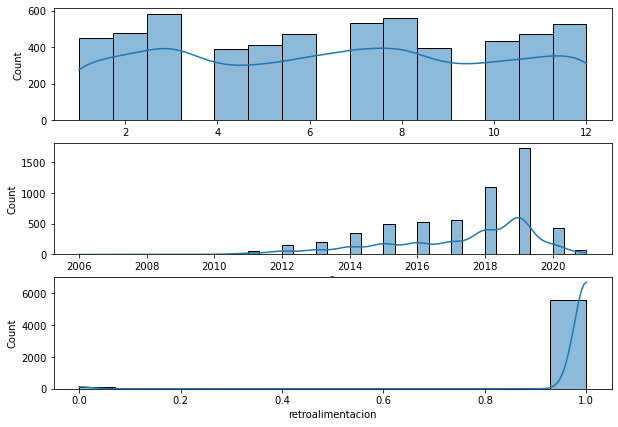

In [10]:
plt.figure(figsize = (10,7))
plt.subplot(3,1,1)
sns.histplot(x = "mes", data = df, kde = True)
plt.subplot(3,1,2)
sns.histplot(x = "año", data = df, kde = True)
plt.subplot(3,1,3)
sns.histplot(x = "retroalimentacion", data = df, kde = True)
plt.show()

## Retroalimetación Positiva vs Negativa

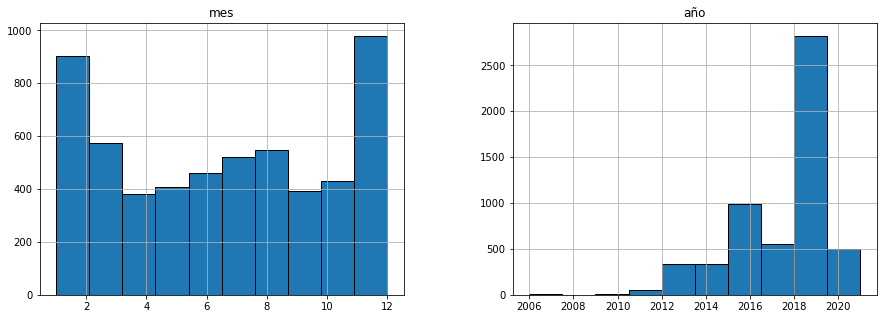

In [11]:
# Retroalimentación positiva
df[df["retroalimentacion"] == 1].drop("retroalimentacion", axis = 1).hist(figsize = (15,5), edgecolor = "black")
plt.show()

In [12]:
df[df["retroalimentacion"] == 1].sort_values(by = "año")

,opinion,mes,año,retroalimentacion
7,Nos alojamos aquí 4 noches y nos encantó. La u...,5,2006,1
8,"Mis amigos y yo, nos encontramos tiradísimos...",5,2006,1
2567,"En el corazón de la ciudad de México, en pleno...",3,2007,1
5,Este hotel está ubicado lejos de la zona princ...,8,2007,1
6,Pasamos tres noches en el Gran Hotel de la Ciu...,3,2007,1
...,...,...,...,...
79,"Los señores alejandro,alfredo,daniel y hugo , ...",2,2021,1
5129,"Es un lugar increíble, parece trasladarte en e...",1,2021,1
63,Me siento agradecida y bendecida por estar aqu...,2,2021,1
61,"Gracias a mis meseros alejandro ,fernando,vent...",3,2021,1


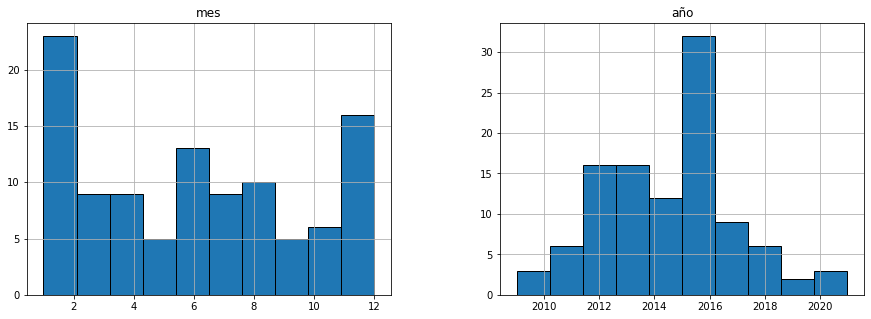

In [13]:
# Retroalimentación negativa
df[df["retroalimentacion"] == 0].drop("retroalimentacion", axis = 1).hist(figsize = (15,5), edgecolor = "black")
plt.show()

In [14]:
df[df["retroalimentacion"] == 0].sort_values(by = "año")

,opinion,mes,año,retroalimentacion
2573,Al llegar a la reservación mi hija solicitó un...,11,2009,0
2571,"Hola, Llevo usando tripadvisor durante años pe...",2,2010,0
2586,"Es un hotel muy bonito, con una vista privileg...",12,2010,0
2647,"El hotel es bonito, principalmente el lobby po...",12,2011,0
51,"estancia en otro sitio, esto no es un gran o u...",2,2011,0
...,...,...,...,...
5521,Downtown Mexico City is very dangerous for tou...,11,2019,0
5769,Beautiful ceiling. Old world charm. However th...,2,2019,0
5407,1- Room 320 smells like mildew 2- Most rooms f...,9,2020,0
5358,The hotel is beautiful but the rooms are out d...,2,2021,0


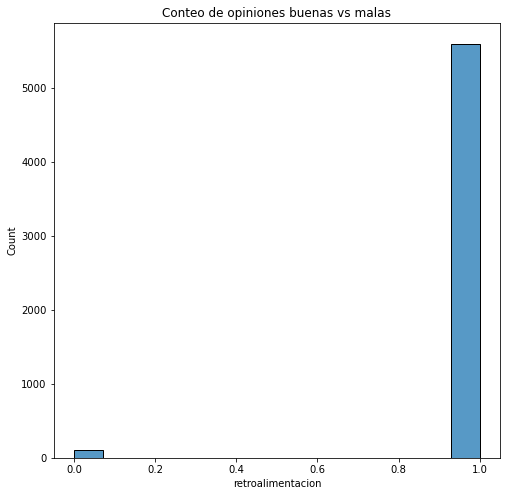

In [24]:
plt.figure(figsize = (8,8))
sns.histplot(data = df["retroalimentacion"])
plt.title("Conteo de opiniones buenas vs malas")
plt.show()

In [26]:
df[df["retroalimentacion"] == 0]["opinion"].count()

105

In [27]:
df[df["retroalimentacion"] == 1]["opinion"].count()

5599

In [34]:
# Total 5704
print("Opiniones buenas: ",(5599*100)/5704, "%")
print("Opiniones malas: ",(105*100)/5704, "%")

Opiniones buenas:  98.15918653576438 %
Opiniones malas:  1.8408134642356242 %


## Repercusión de la pandemia 2019 vs 2020

In [93]:
# 2019 vs 2020
comp = []
for val in df["año"]:
    if val == 2020:
        comp.append(val)
    elif val == 2019:
        comp.append(val)

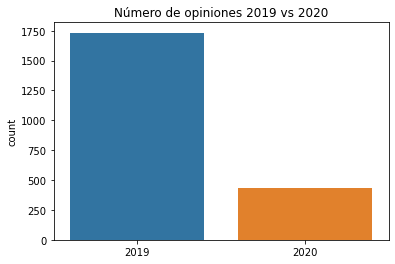

In [100]:
sns.countplot(x = comp)
plt.title("Número de opiniones 2019 vs 2020")
plt.show()

In [95]:
# Número de opiniones en el año 2019 
df[df["año"] == 2019]["opinion"].count()

1733

In [93]:
# Número de opiniones en el año 2020 
df[df["año"] == 2020]["opinion"].count()

436

In [100]:
100 - ((436 * 100) / 1733)

74.84131563762261

## WordCloud

In [108]:
# Procesamiento de los datos
# Las opiniones: Serán removidas las stopwords, los signos y lo números
# STOPWORDS
nltk.download('stopwords')
STOPWORDS_SPANISH = nltk.corpus.stopwords.words('spanish')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP-001\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [109]:
# Agregamos una palabra que seguro se repetirá mucho y no es necesaria "Hotel" y "Hoteles"
STOPWORDS_SPANISH.append("hotel")
STOPWORDS_SPANISH.append("hoteles")

In [112]:
# CARACTERES ESPECIALES
signos = list(string.punctuation)

In [113]:
# NUMEROS
numeros = list(["0","1","2","3","4","5","6","7","8","9"])

In [115]:
opiniones = []
for phrase in df["opinion"]:
    opinion = [word for word in phrase.split() if word.lower() not in STOPWORDS_SPANISH]
    opiniones.append(" ".join(opinion))

new_opiniones = []
for opinion in opiniones:
    sin_signos = [char for char in opinion if char not in signos]
    new_opiniones.append("".join(sin_signos))
    
clean_opinions = []
for opinion in new_opiniones:
    sin_num = [char for char in opinion if char not in numeros]
    clean_opinions.append("".join(sin_num))
    

In [117]:
# Sustituirimos la variable opinion con las nuevas
df["opinion"] = clean_opinions

In [120]:
# Sepraemos las opiniones buenas de las malas
buenas = ""
malas = ""
for i, cal in enumerate(df["retroalimentacion"]):
    try:
        if cal == 1:
            buenas += df["opinion"][i]
        else:
            malas += df["opinion"][i]
    except:
        pass

In [123]:
wordcloud1 = WordCloud().generate(buenas)
wordcloud2 = WordCloud().generate(malas)

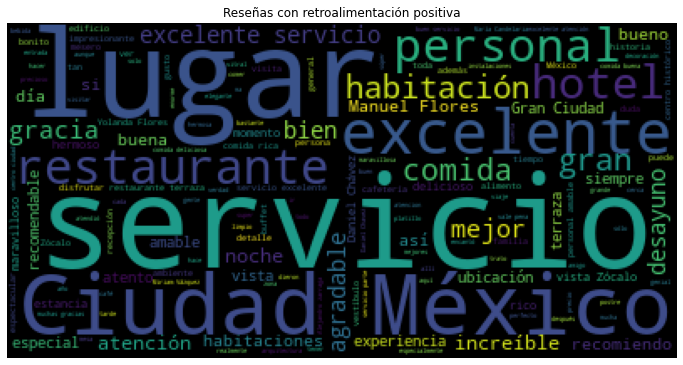

In [124]:
# Las palabras más usadas en la retroalimentación positiva
plt.figure(figsize = (12,12))
plt.imshow(wordcloud1)
plt.title("Reseñas con retroalimentación positiva")
plt.grid(False)
plt.axis(False)
plt.show()

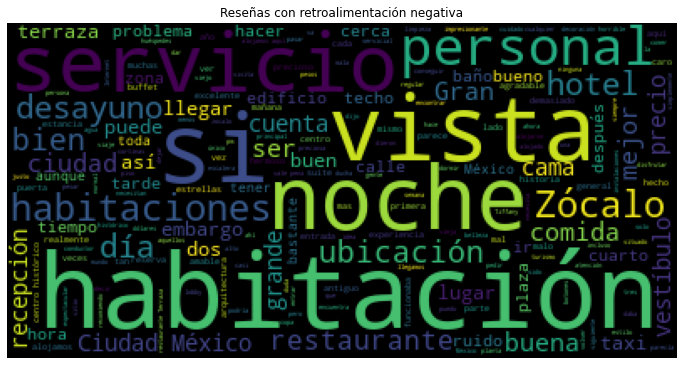

In [125]:
# Las palabras más usadas en la retroalimentación negativa
plt.figure(figsize = (12,12))
plt.imshow(wordcloud2)
plt.title("Reseñas con retroalimentación negativa")
plt.grid(False)
plt.axis(False)
plt.show()

In [133]:
# Buscamos todas las opiniones con la palabra habitación
df_ac = pd.read_csv("./") 
negativas = df[df["retroalimentacion"] == 0]
opiniones = negativas.loc[negativas["opinion"].str.contains("si")]

In [143]:
opiniones["opinion"][48]

'aeropuerto llegamos Gran taxi dejaron calle arrastraban maletas pesadas entradas tramo escaleras parecía ciudad desierto estación ningún tren líneas tren lejana diagonal esquina través luz merky sábado portero inmóvil llegamos frente recepción dieron habitación llevado portero sentimos hereonin cacooned Ahora tiempo habitaciones estilo victoriano sentidos esencia mauseleum recomendaría desgracia vista sitios web daba directamente pared edificio colindante inundó baño  seguros si causado ducha baño'

## Datos relevantes

In [97]:
datos = df.groupby("año")
datos.mean()

,mes,retroalimentacion
año,,
2006,5.000000,1.000000
2007,4.666667,1.000000
2008,1.000000,1.000000
2009,7.000000,0.800000
2010,7.714286,0.714286
2011,7.586207,0.896552
2012,6.346154,0.897436
2013,6.730769,0.923077
2014,6.910405,0.965318


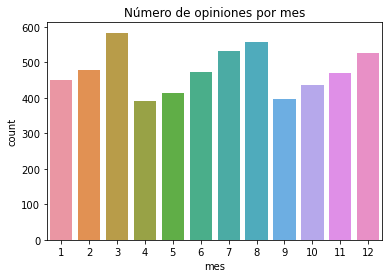

In [105]:
# Meses mas comunes
sns.countplot(x = df["mes"])
plt.title("Número de opiniones por mes")
plt.show()

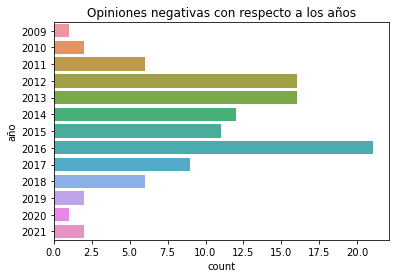

In [115]:
# Opiniones malas
sns.countplot(y = df[df["retroalimentacion"] == 0]["año"])
plt.title("Opiniones negativas con respecto a los años")
plt.show()

In [126]:
df[df["retroalimentacion"] == 0]["mes"].sort_values()[-15:-1]

5521    11
1565    11
1633    11
2573    11
504     11
2864    11
3246    11
2586    12
248     12
2347    12
952     12
2647    12
3052    12
3970    12
Name: mes, dtype: int64

In [131]:
# Buscamos todas las opiniones con la palabra habitación
humedad = df.loc[df["opinion"].str.contains("humedad")]

In [132]:
humedad

,opinion,mes,año,retroalimentacion
248,"Había un olor a humedad, una mezcla de olores ...",12,2012,0
1150,Después de 3 semanas alojados en un hotel para...,5,2015,0
3266,"Económico, $2204.00 mx la noche por pareja, am...",6,2015,1


In [148]:
# Humedad 5769, año 2019
# Humedad 5407, año 2020
humedad["opinion"][3266]

'Económico, $2204.00 mx la noche por pareja, amena recepción con una copa de champagne recibido del hotel para conocer un poco sobre sus elevadores de techo de vitrales, sus escaleras etc., etc, todo el personal muy atento y con una sonrisa, cortesías con bocadillos y dulces regionales, la habitación amplia con vista al zócalo (esta vez muy limpio) de día disfrutar de su colorido y por la noche de sus edificios iluminados. Dos detalles que hay que poner atención: huele un poco a humedad en el pasillo que separa las habitaciones del patio y dos suena mucho el ventilador, aun en posición más baja.'

In [135]:
# Buscamos todas las opiniones con la palabra habitación
moho = df.loc[df["opinion"].str.contains("moho")]

In [136]:
moho

,opinion,mes,año,retroalimentacion
65,"Para lo que pagamos, el Gran Hotel Ciudad de M...",3,2012,1
1150,Después de 3 semanas alojados en un hotel para...,5,2015,0


In [139]:
# Buscamos todas las opiniones con la palabra habitación
hum = df.loc[df["opinion"].str.contains("mold")]

In [149]:
hum

,opinion,mes,año,retroalimentacion
505,Este hotel tiene el techo más increíble de cri...,1,2014,1
5763,We are both allergic to carpets and any mold o...,2,2019,1


In [150]:
hum["opinion"][5763]

'We are both allergic to carpets and any mold or mildew in the environment. Consequently we experienced challenges sleeping in the rooms. We found everyone very component, friendly and helpful. The rooms were clean, pleasant and the service was excellent at every level. Unfortunately, for us, staying in a "historical" building came with environmental risks.'

In [141]:
# Buscamos todas las opiniones con la palabra habitación
olor = df.loc[df["opinion"].str.contains("huele")]

In [142]:
olor

,opinion,mes,año,retroalimentacion
2827,"Maravilloso trato que nos dieron en el hotel, ...",7,2012,1
3266,"Económico, $2204.00 mx la noche por pareja, am...",6,2015,1


In [144]:
df["opinion"][3266]

'Económico, $2204.00 mx la noche por pareja, amena recepción con una copa de champagne recibido del hotel para conocer un poco sobre sus elevadores de techo de vitrales, sus escaleras etc., etc, todo el personal muy atento y con una sonrisa, cortesías con bocadillos y dulces regionales, la habitación amplia con vista al zócalo (esta vez muy limpio) de día disfrutar de su colorido y por la noche de sus edificios iluminados. Dos detalles que hay que poner atención: huele un poco a humedad en el pasillo que separa las habitaciones del patio y dos suena mucho el ventilador, aun en posición más baja.'

In [145]:
# Buscamos todas las opiniones con la palabra habitación
smell = df.loc[df["opinion"].str.contains("smell")]

In [146]:
smell

,opinion,mes,año,retroalimentacion
5407,1- Room 320 smells like mildew 2- Most rooms f...,9,2020,0
5769,Beautiful ceiling. Old world charm. However th...,2,2019,0
6082,Very comfortable bed. - Not hard as is usually...,10,2017,1


In [152]:
smell["opinion"][5769]

'Beautiful ceiling. Old world charm. However there is also a musty smell and street noise can be quite bothersome.'